<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/Gradient_Boosting_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Gradient Boosting(In this algorithm each new model is trained to minimize the loss function of the previous model using gradient descent)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("/content/winequality-red(ML - Gradient Boosting datset).csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
df.shape

(1599, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
# Predict wine quality score using regression
# df.drop("quality", axis = 1): Creates a new DataFrame without the "quality" column and axis = 1 drop a column
# y_reg = df["quality"]: Selects the "quality" column as your target variable (y).
x = df.drop("quality", axis = 1)
y_reg = df["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y_reg, test_size = 0.2, random_state = 42)

In [28]:
# n_estimators: nNumber of boosting stages (i.e., how many trees will be built sequentially)
# learning rate: How much each tree contributes to the final prediction, smaller values gives slower learning but can improve generalization.
# max_depth: Maximum depth of each decision tree (weak learner) it controls complexity
# subsample: Fraction of training data used for fitting each tree, it helps to reduce overfitting.
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 4, subsample = 0.8, random_state = 42)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

In [29]:
# mse: Average squared difference between the actual values (y_true) and predicted values (y_pred), used to find prediction absolute term
# r2_score: It measures how well your model explains the variance of the target variable.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Regression")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

Regression
Mean Squared Error: 0.338
R2 Score: 0.483


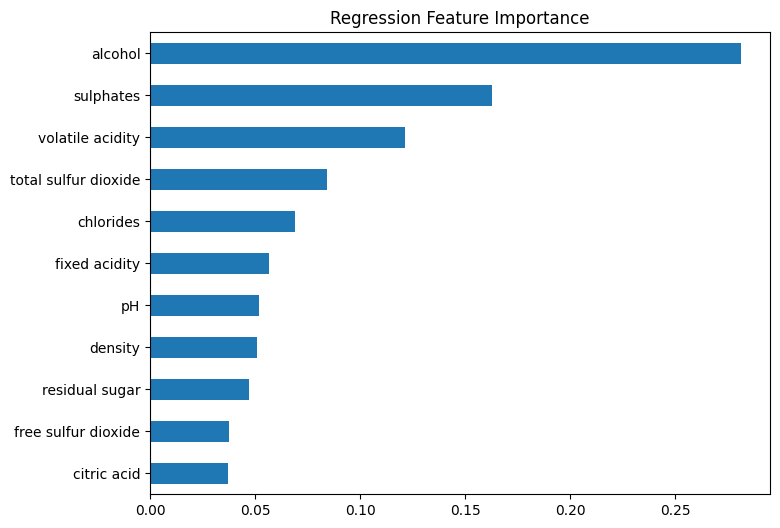

In [30]:
# pd.Series: It is 1-D array panda series, to map values to labels
# gbr.feature_importances_: It tells how much a feature contributed to reducing the prediction error, to easily analyze the model.
# sort_values(): Sorts features by importance from smallest to largest.
# plot(kind='barh'): Creates a horizontal bar chart for easy visualization.
feat_importance = pd.Series(gbr.feature_importances_, index = x.columns)
feat_importance.sort_values().plot(kind = 'barh', figsize = (8,6), title = 'Regression Feature Importance')
plt.show()

In [31]:
# Categorize wine quality using classification
# pd.cut(): bins numeric values into categories.
# bins=[2,4,6,8]: 2 < quality <= 4 is low quality, 4 < quality <= 6 is medium quality, 6 < quality <= 8 is high quality
# stratify = y_clf: It ensures proportion of "low", "medium", "high" is maintained in both train and test sets
y_clf = pd.cut(df["quality"], bins = [2,4,6,8], labels = ["low", "medium", "high"])
x_train, x_test, y_train, y_test = train_test_split(x, y_clf, test_size = 0.2, random_state = 42, stratify = y_clf)
gbc = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.05, max_depth = 4, subsample = 0.8, random_state = 42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=500,
                           random_state=42, subsample=0.8)

In [32]:
y_pred = gbc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification")
print(f"Accuracy: {accuracy:.3f}") # accuracy:.3f: Shows 3 no. after decimal as a fixed point decimal or f
print(classification_report(y_test, y_pred))

Classification
Accuracy: 0.859
              precision    recall  f1-score   support

        high       0.66      0.58      0.62        43
         low       0.20      0.08      0.11        13
      medium       0.90      0.94      0.92       264

    accuracy                           0.86       320
   macro avg       0.59      0.53      0.55       320
weighted avg       0.84      0.86      0.85       320



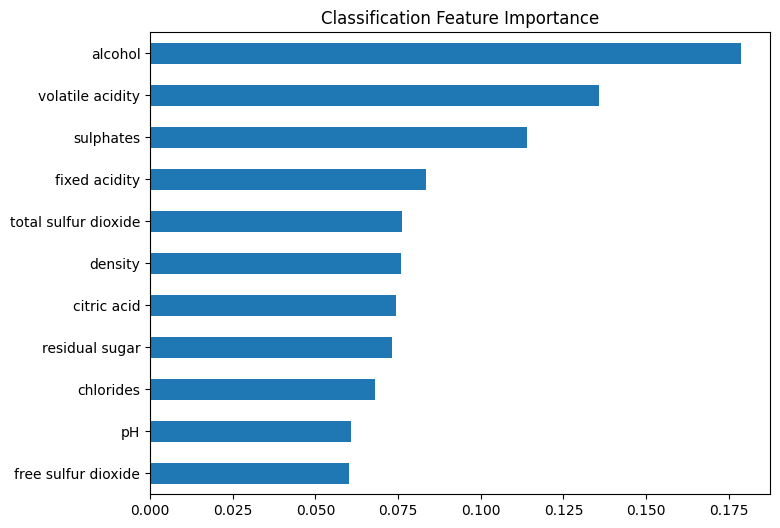

In [33]:
feat_importance = pd.Series(gbc.feature_importances_, index = x.columns)
feat_importance.sort_values().plot(kind = 'barh', figsize = (8,6), title = 'Classification Feature Importance')
plt.show()